In [836]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Business_case_PRCL_0012.csv")
data.head()

In [ ]:
pd.set_option("display.max_columns",None)
data.head()

In [ ]:
### Exploratory Data Analysis ###

In [ ]:
data.drop(['CI_Name','KB_number','Related_Interaction','Related_Change'],axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
numerical=data.select_dtypes(include=["int64","float64"]).columns.tolist()
numerical

In [ ]:
categorical=data.select_dtypes(include=['object']).columns.tolist()
categorical

In [ ]:
for i in categorical:
  print(i,data[i].unique())
  print("------------------------")

In [ ]:
for i in categorical:
  print(i,data[i].value_counts())
  print("----------------------------")

In [ ]:
data.drop("Alert_Status",axis=1,inplace=True)
data.head()

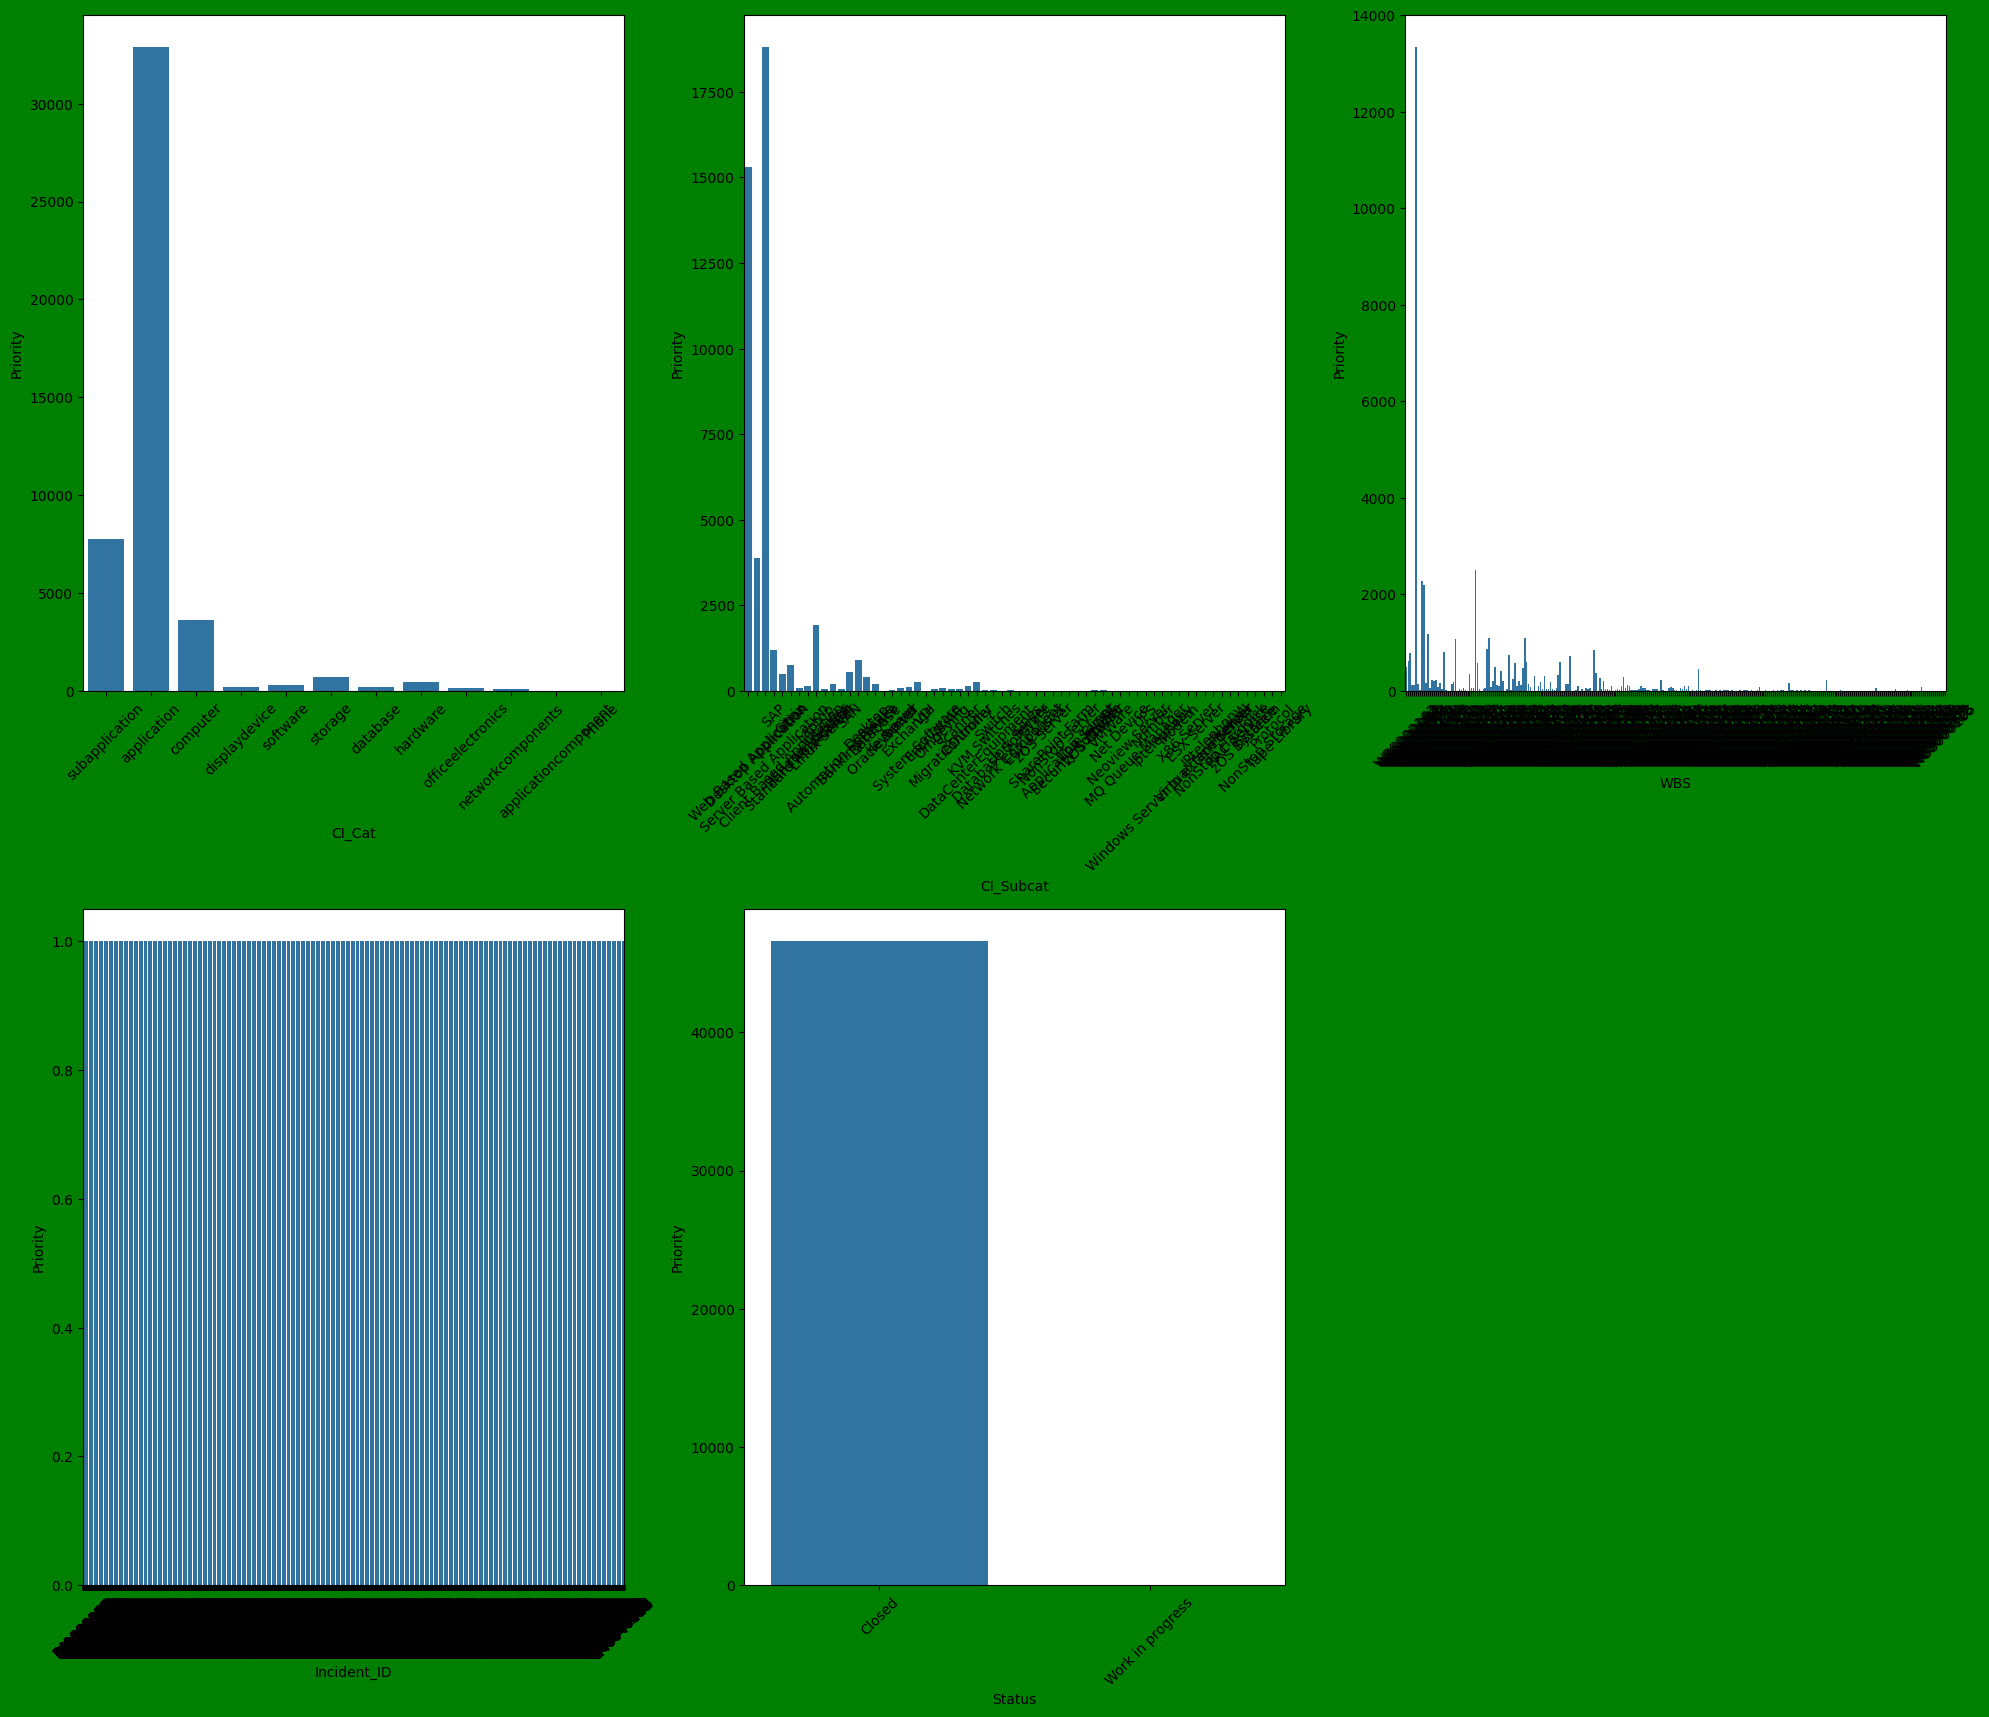

In [706]:
#univariant analysis
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1
for column in data.columns:
  if plotnumber<=5:
    if data[column].dtype in ['object']:
      plt.subplot(3,3,plotnumber)
      sns.countplot(x=data[column])
      plt.xlabel(column,fontsize=10)
      plt.ylabel("Priority",fontsize=10)
      plt.xticks(rotation=45)
      plotnumber+=1
plt.tight_layout()
plt.show()

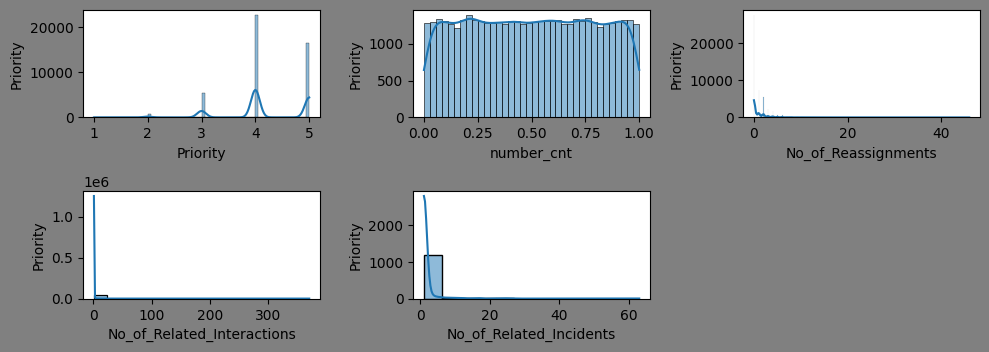

In [707]:
#univariant analysis
plt.figure(figsize=(10,5),facecolor='grey')
plotnumber=1
for column in data.columns:
  if plotnumber<=5:
    if data[column].dtype in ['int64','float64']:
      plt.subplot(3,3,plotnumber)
      sns.histplot(x=data[column],kde=True)
      plt.xlabel(column,fontsize=10)
      plt.ylabel("Priority",fontsize=10)
      plotnumber+=1
plt.tight_layout()
plt.show()

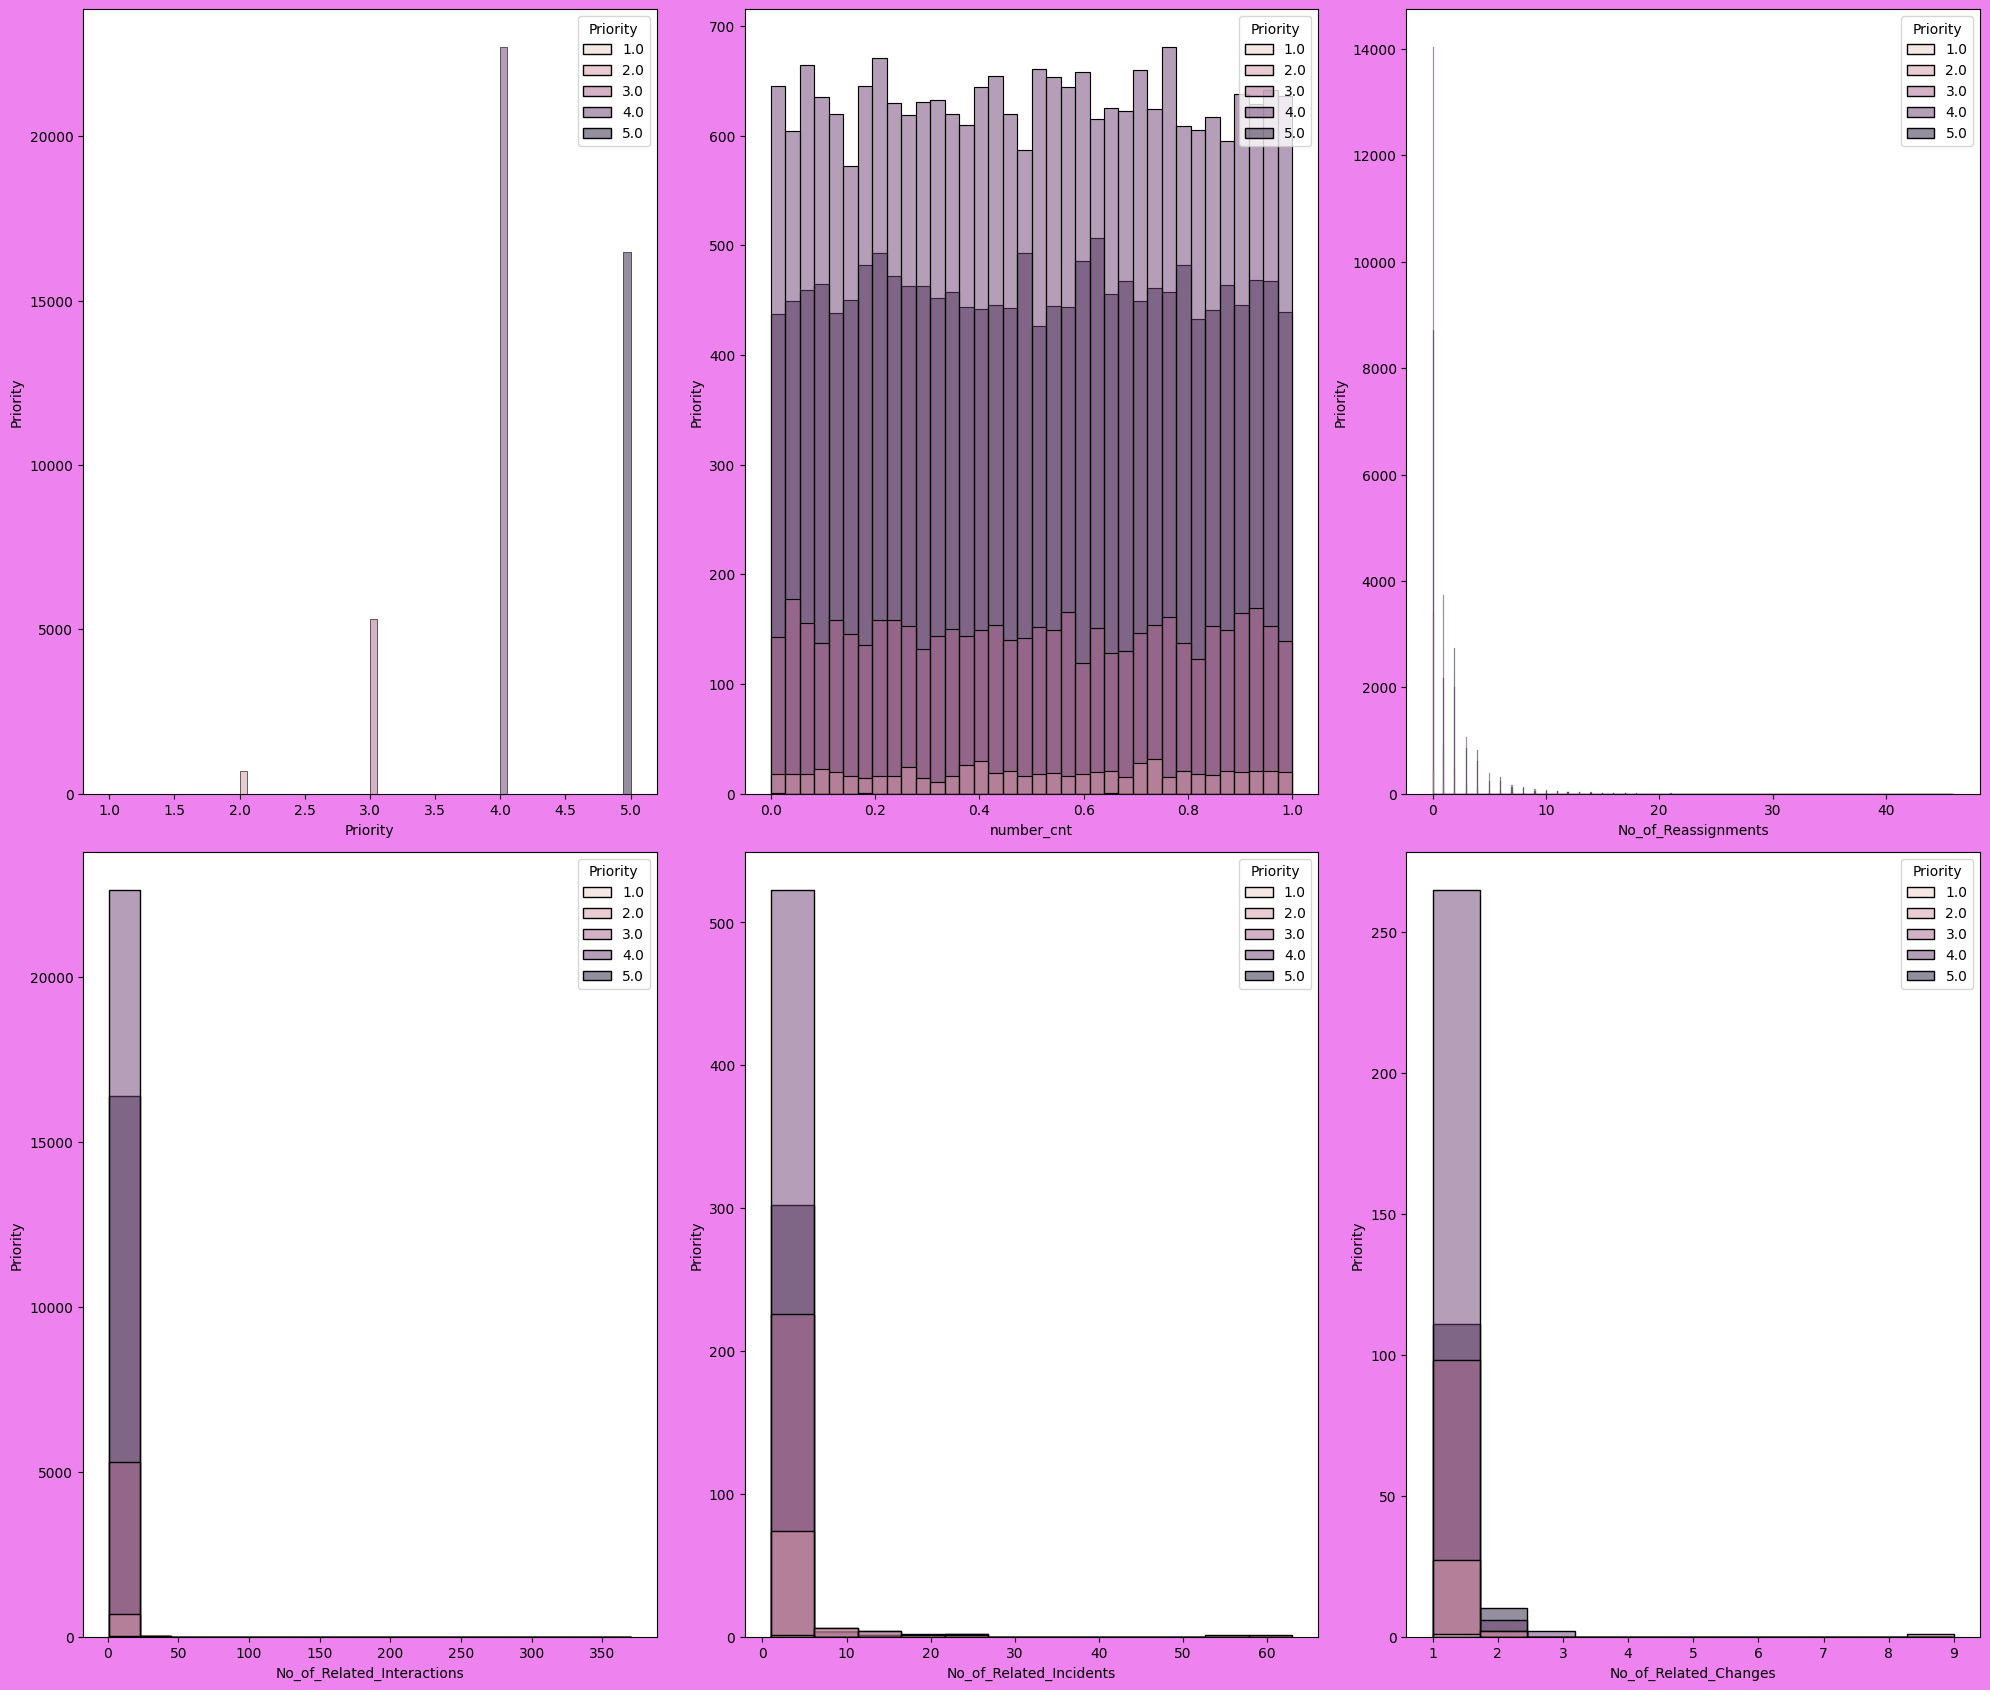

In [708]:
#bivariant analysis
plt.figure(figsize=(20,25),facecolor='violet')
plotnumber=1
ax=data['Priority']
for column in data.columns:
  if plotnumber<=6:
    if data[column].dtype in ['int64','float64']:
      plt.subplot(3,3,plotnumber)
      sns.histplot(x=data[column],hue=ax)
      plt.xlabel(column,fontsize=10)
      plt.ylabel("Priority",fontsize=10)
      plotnumber+=1
plt.tight_layout()
plt.show()

<Figure size 4000x4500 with 0 Axes>

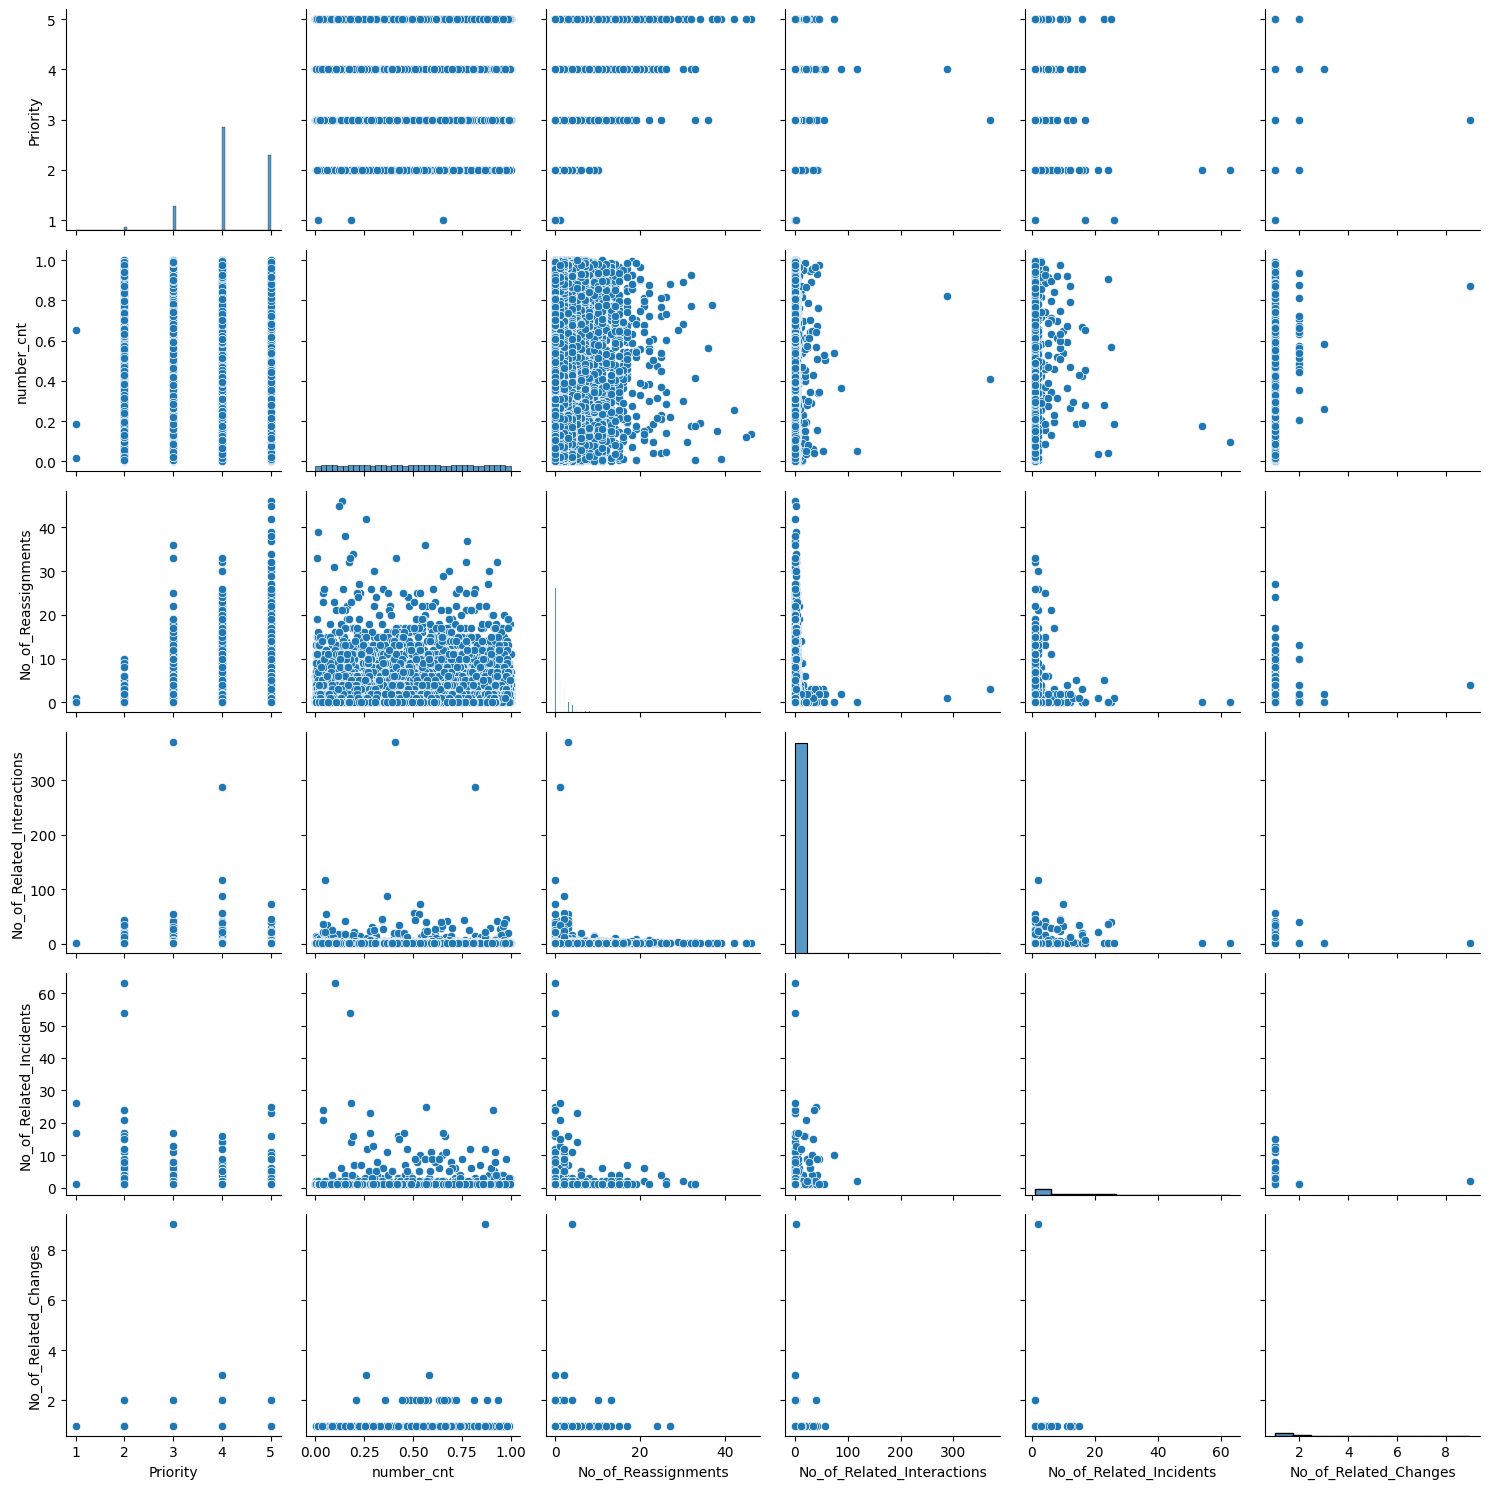

In [709]:
#Multivariant Analysis
plt.figure(figsize=(40,45))
sns.pairplot(data)
plt.tight_layout()

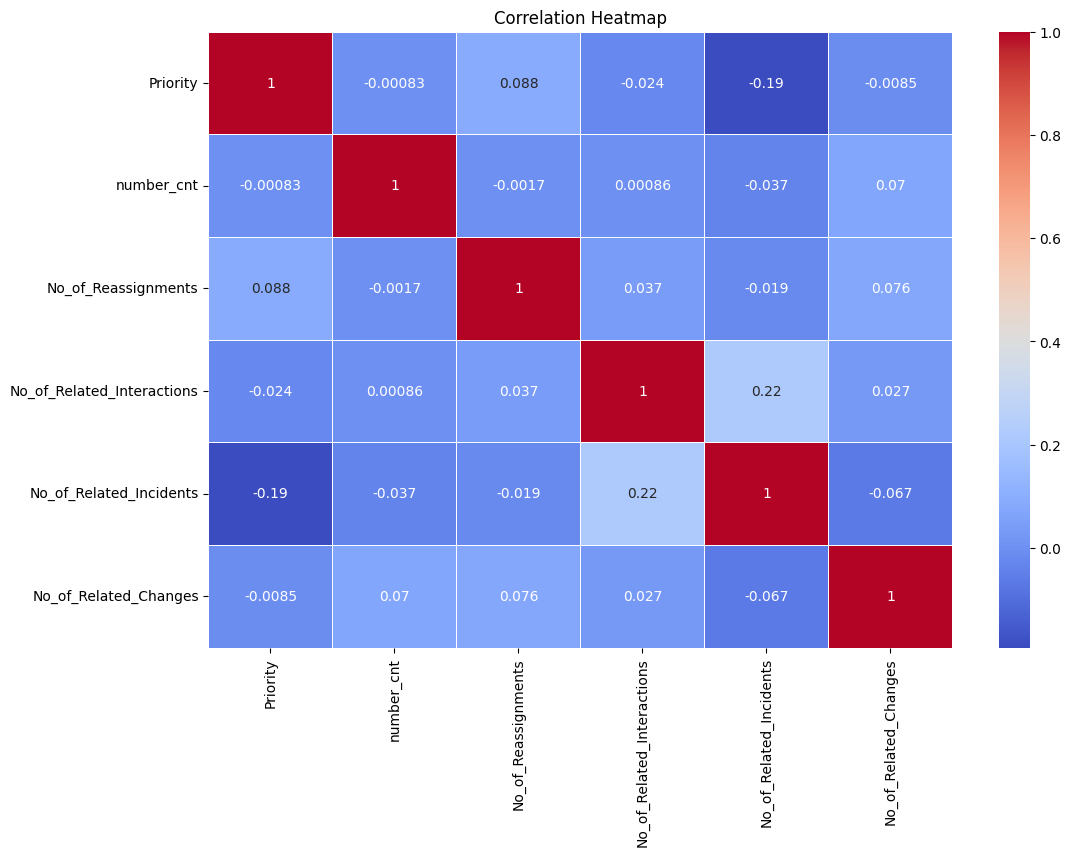

In [710]:
#Correlation analysis
num=data.select_dtypes(include=("int64","float64"))
plt.figure(figsize=(12,8))
correlation=num.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [711]:
### Data Preprocessing ###

In [712]:
#Checking Null Values
data.isnull().sum()

,0
CI_Cat,111
CI_Subcat,111
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0
Category,0


In [713]:
#Checking duplicate values
data.duplicated().sum()

np.int64(0)

In [714]:
#Replacing null values for CI_Cat
data[data['CI_Cat'].isnull()]['CI_Cat']

,CI_Cat
316,NaN
538,NaN
593,NaN
670,NaN
1128,NaN
...,...
34462,NaN
34868,NaN
36150,NaN
38262,NaN


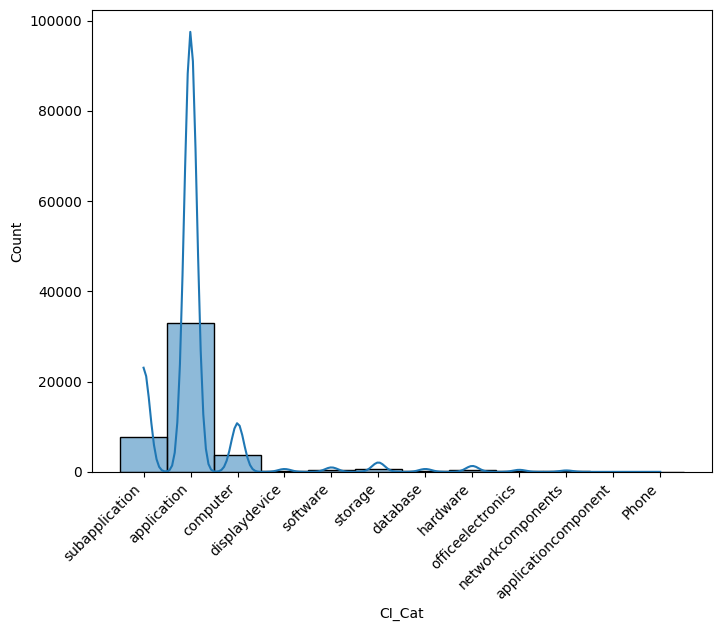

In [715]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['CI_Cat'],kde=True)
plt.xticks(rotation=45,ha='right')
plt.show()

In [716]:
#Here we can see outler at the high end and hence we are applying mode for this data column

In [717]:
data['CI_Cat'].mode()

,CI_Cat
0,application


In [718]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

,count
CI_Cat,
application,32900
subapplication,7782
computer,3643
storage,703
hardware,442
software,333
database,214
displaydevice,212
officeelectronics,152


In [719]:
data.loc[data['CI_Cat'].isnull()==True,'CI_Cat']='application'

In [720]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,111
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0
Category,0


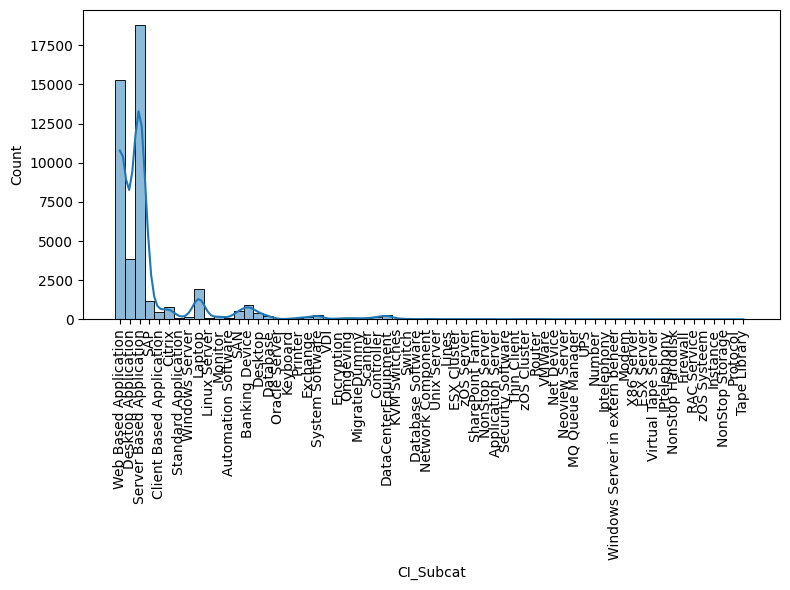

In [721]:
#Replacing the null values for CI_Subcat
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['CI_Subcat'],kde=True)
plt.xticks(rotation=90)
plt.tight_layout()

In [722]:
# Here outlier is somewhat small in the high end hence going to use mode
# technique for this data column %%

In [723]:
data['CI_Subcat'].mode()

,CI_Subcat
0,Server Based Application


In [724]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

,count
CI_Subcat,
Server Based Application,18811
Web Based Application,15311
Desktop Application,3876
Laptop,1921
SAP,1199
...,...
Windows Server in extern beheer,1
Virtual Tape Server,1
RAC Service,1


In [725]:
data.loc[data['CI_Subcat'].isnull()==True,'CI_Subcat']='Server Based Application'

In [726]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0
Category,0


In [727]:
#Replacing null value for priority
data[data['Priority'].isnull()]['Priority']

,Priority
2,NaN
8,NaN
103,NaN
147,NaN
152,NaN
...,...
46424,NaN
46446,NaN
46484,NaN
46553,NaN


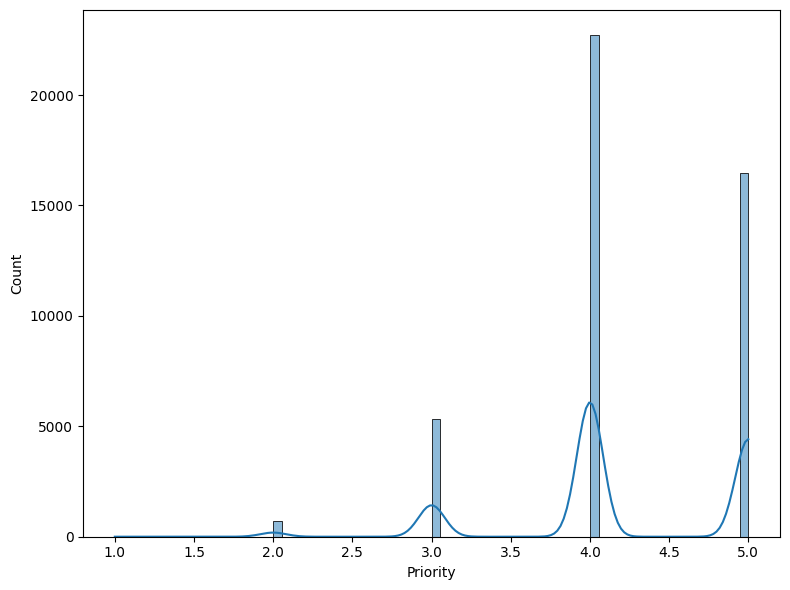

In [728]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['Priority'],kde=True)
plt.tight_layout()

In [729]:
data['Priority'].median()

4.0

In [730]:
data['Priority'].mode()

,Priority
0,4.0


In [731]:
data.loc[data['Priority'].isnull()==True,'Priority']=4.0

In [732]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


In [733]:
#remove the row with null value for no of reassignments
data=data.dropna(subset=['No_of_Reassignments'])

In [734]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


In [735]:
#Replacing null values for Closure Code
data[data['Closure_Code'].isnull()]['Closure_Code']

,Closure_Code
9275,NaN
9488,NaN
9698,NaN
9989,NaN
10045,NaN
...,...
46077,NaN
46247,NaN
46291,NaN
46357,NaN


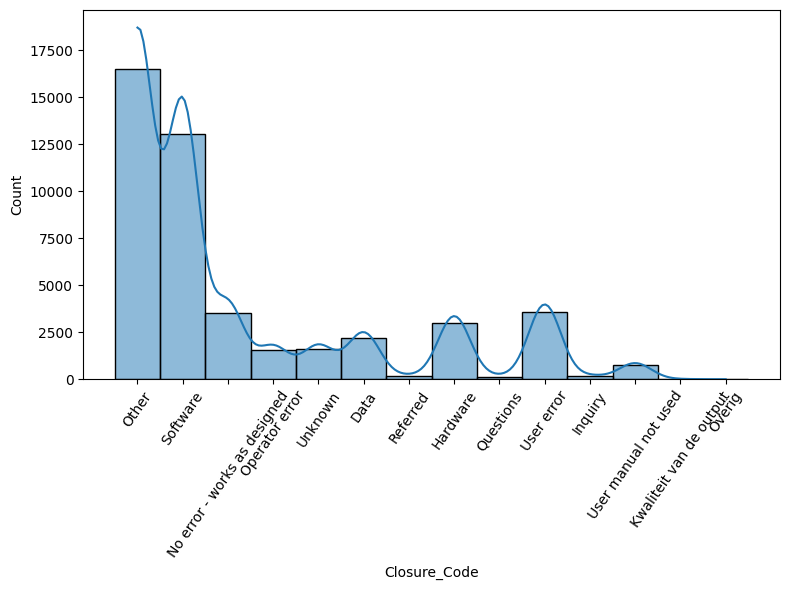

In [736]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['Closure_Code'],kde=True)
plt.xticks(rotation=55)
plt.tight_layout()

In [737]:
data['Closure_Code'].mode()

,Closure_Code
0,Other


In [738]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

,count
Closure_Code,
Other,16470
Software,13026
User error,3554
No error - works as designed,3530
Hardware,2999
Data,2209
Unknown,1590
Operator error,1539
User manual not used,765


In [739]:
data.loc[data['Closure_Code'].isnull()==True,['Closure_Code']]='other'

In [740]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


In [741]:
#Replacing null values for No_of_Related_Interactions
data[data['No_of_Related_Interactions'].isnull()]['No_of_Related_Interactions']

,No_of_Related_Interactions
300,NaN
1085,NaN
2483,NaN
3035,NaN
3299,NaN
...,...
46468,NaN
46469,NaN
46470,NaN
46472,NaN


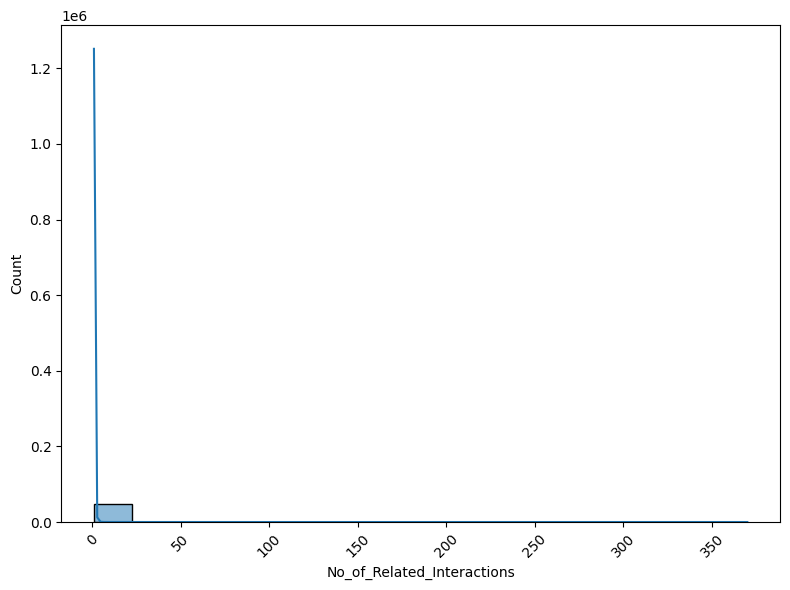

In [742]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['No_of_Related_Interactions'],kde=True)
plt.xticks(rotation=45)
plt.tight_layout()

In [743]:
data['No_of_Related_Interactions'].median()

1.0

In [744]:
data['No_of_Related_Interactions'].mode()

,No_of_Related_Interactions
0,1.0


In [745]:
data.loc[data['No_of_Related_Interactions'].isnull()==True,'No_of_Related_Interactions']=1.0

In [746]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


In [747]:
#In CI_Cat and CI_Subcat has more labels hence short the labels into different categories and replacing the other values into mode.

In [748]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace([np.nan,'application'],inplace=True)

In [749]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [750]:
data[data['No_of_Related_Changes'].isnull()]['No_of_Related_Changes']

,No_of_Related_Changes
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
46601,NaN
46602,NaN
46603,NaN
46604,NaN


In [751]:
data.No_of_Related_Changes.unique()
data.No_of_Related_Changes.value_counts()

,count
No_of_Related_Changes,
1.0,536
2.0,21
3.0,2
9.0,1


In [752]:
data['No_of_Related_Changes'].median()

1.0

In [753]:
data['No_of_Related_Changes']=data['No_of_Related_Changes'].fillna(2)

In [754]:
data.isnull().sum()

,0
CI_Cat,0
CI_Subcat,0
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,0
number_cnt,0
Category,0


In [755]:
data['No_of_Related_Changes'].value_counts()

,count
No_of_Related_Changes,
2.0,46066
1.0,536
3.0,2
9.0,1


In [756]:
data[data['No_of_Related_Incidents'].isnull()]['No_of_Related_Incidents']

,No_of_Related_Incidents
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
...,...
46601,NaN
46602,NaN
46603,NaN
46604,NaN


In [757]:
data.No_of_Related_Incidents.unique()
data.No_of_Related_Incidents.value_counts()

,count
No_of_Related_Incidents,
1.0,1057
2.0,74
3.0,20
4.0,13
5.0,8
6.0,8
9.0,6
8.0,5
7.0,4


In [758]:
data['No_of_Related_Incidents'].median()

1.0

In [759]:
data['No_of_Related_Incidents']=data['No_of_Related_Incidents'].fillna(1)

In [760]:
data.No_of_Related_Incidents.value_counts()

,count
No_of_Related_Incidents,
1.0,46440
2.0,74
3.0,20
4.0,13
5.0,8
6.0,8
9.0,6
8.0,5
7.0,4


In [761]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)

In [762]:
#Checking missing percentage values
data.isnull().sum()/len(data)*100

,0
CI_Cat,0.000000
CI_Subcat,0.000000
WBS,0.000000
Incident_ID,0.000000
Status,0.000000
Impact,0.000000
Urgency,0.000000
Priority,0.000000
number_cnt,0.000000
Category,0.000000


In [763]:
data.drop("Reopen_Time",axis=1,inplace=True)

In [764]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'No_of_Reassignments',
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [765]:
#Check for outliers

In [766]:
num_data=data.select_dtypes(include=['int64','float64']).columns

In [767]:
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [768]:
cat_data=data.select_dtypes(include=['object']).columns

In [769]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Open_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

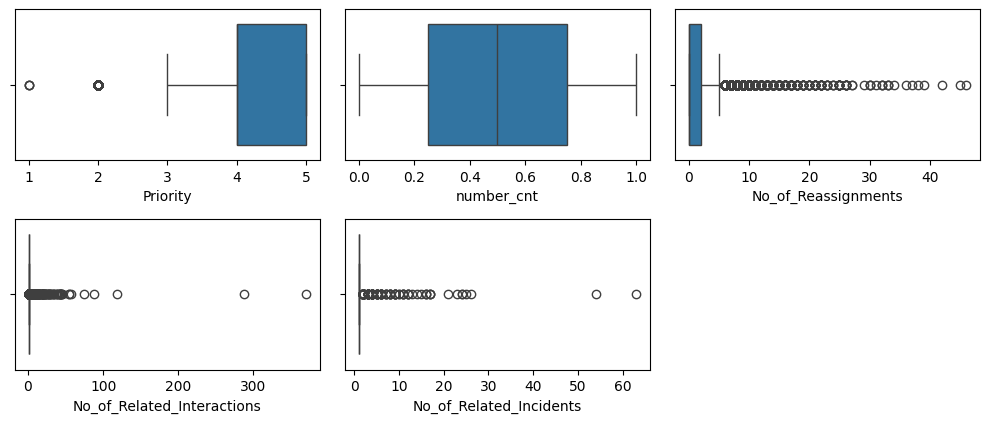

In [770]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_data:
  if plotnumber<=5:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [771]:
#Above numerical column data number_cnt has no outlier remaining column has been identified major outliers so removing outlier using interquartile method

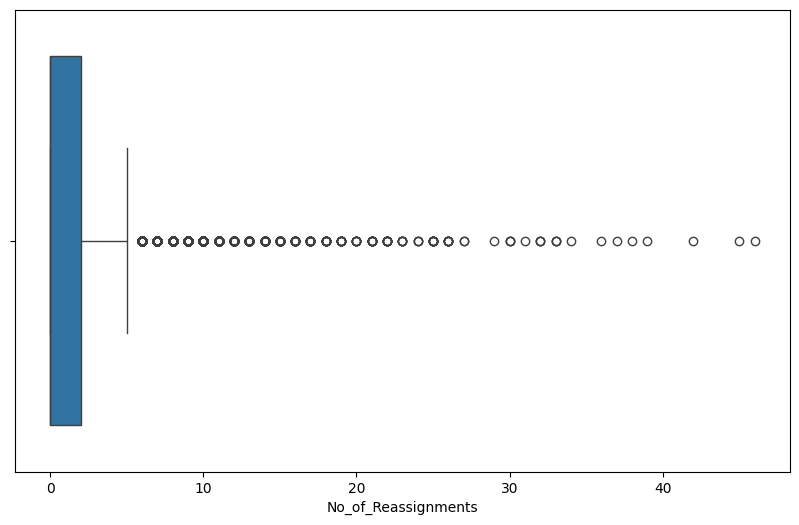

In [772]:
#Removing outlier for No_of_Reassignments
plt.figure(figsize=(10,6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.show()

In [773]:
Q1=data['No_of_Reassignments'].quantile(0.25)
Q3=data['No_of_Reassignments'].quantile(0.75)
print("lower_quantile",Q1)
print('Upper_quantile',Q3)

lower_quantile 0.0
Upper_quantile 2.0


In [774]:
IQR=Q3-Q1
print(f'Inter Quantile Range: {IQR}')

Inter Quantile Range: 2.0


In [775]:
Lower_limit=Q1-1.5*IQR
print("Lower_limit :",Lower_limit)
Upper_limit=Q3+1.5*IQR
print("Upper_limit :",Upper_limit)

Lower_limit : -3.0
Upper_limit : 5.0


In [776]:
data.loc[data['No_of_Reassignments']>Upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,2.0,2.0
1,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
3,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
10,application,Web Based Application,WBS000088,IM0000019,Closed,4,4,4.0,0.439909,incident,6.0,21-09-2012 12:56,08-11-2013 14:23,08-11-2013 14:23,"3,06,74,49,167",Software,1.0,1.0,1.0
11,application,Web Based Application,WBS000088,IM0000020,Closed,4,4,4.0,0.291928,incident,8.0,01-10-2012 10:49,08-11-2013 14:18,08-11-2013 14:22,"1,32,26,19,167",Software,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,WBS000199,IM0045375,Closed,3,3,3.0,0.267787,incident,10.0,21-03-2014 15:57,31-03-2014 17:28,31-03-2014 17:28,"5,81,92,22,222",Other,2.0,1.0,2.0
45040,application,Server Based Application,WBS000152,IM0045455,Closed,5,5,5.0,0.680022,incident,6.0,24-03-2014 09:57,25-03-2014 14:30,25-03-2014 14:30,"1,50,36,66,667",Software,1.0,1.0,2.0
45196,application,Server Based Application,WBS000263,IM0045618,Closed,4,4,4.0,0.449103,incident,7.0,24-03-2014 13:33,26-03-2014 08:43,26-03-2014 08:43,"1,61,62,77,778",Other,1.0,1.0,2.0
45273,application,Desktop Application,WBS000089,IM0045696,Closed,4,4,4.0,0.166302,incident,8.0,25-03-2014 08:40,31-03-2014 12:48,31-03-2014 12:48,"3,17,67,22,222",Software,1.0,1.0,2.0


In [777]:
len(data.loc[data['No_of_Reassignments']>Upper_limit])/len(data)

0.042334513464220576

In [778]:
data.loc[data['No_of_Reassignments']>Upper_limit,'No_of_Reassignments']=data['No_of_Reassignments'].median()

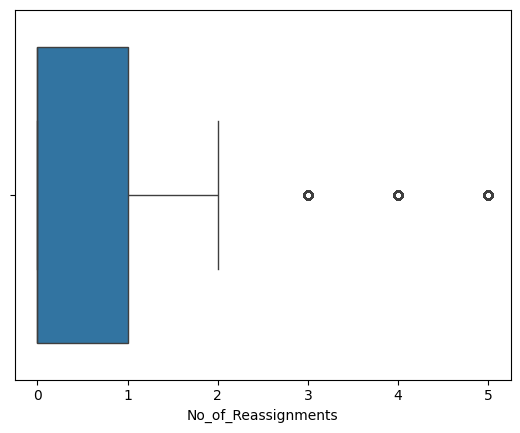

In [779]:
sns.boxplot(x=data['No_of_Reassignments'])
plt.show()

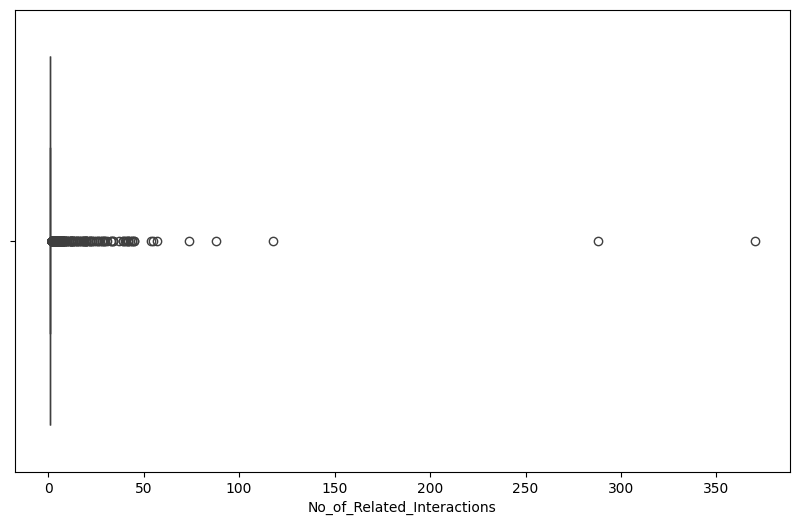

In [780]:
#Removing Outliers for No_of_related_Interactions
plt.figure(figsize=(10,6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.show()

In [781]:
Q1=data['No_of_Related_Interactions'].quantile(0.25)
Q3=data['No_of_Related_Interactions'].quantile(0.75)
print("Lower Quantile: ",Q1)
print("Upper Quantile: ",Q3)

Lower Quantile:  1.0
Upper Quantile:  1.0


In [782]:
IQR=Q3-Q1
print("Inter Quantile Range is ",IQR)

Inter Quantile Range is  0.0


In [783]:
Lower_limit=Q1-1.5*IQR
print("Lower_limit :",Lower_limit)
Upper_limit=Q3+1.5*IQR
print("Upper_limit :",Upper_limit)

Lower_limit : 1.0
Upper_limit : 1.0


In [784]:
data.loc[data['No_of_Related_Interactions']>Upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12,application,Web Based Application,WBS000055,IM0000021,Closed,4,4,4.0,0.776486,incident,5.0,02-10-2012 12:12,04-02-2014 09:38,04-02-2014 09:38,"1,13,24,28,333",Software,2.0,1.0,2.0
18,application,Desktop Application,WBS000092,IM0000033,Closed,3,3,3.0,0.860255,incident,0.0,07-12-2012 14:34,30-11-2013 10:39,30-11-2013 10:39,"2,62,67,33,889",Other,2.0,1.0,2.0
19,application,Web Based Application,WBS000055,IM0000034,Closed,5,5,5.0,0.663615,incident,5.0,10-12-2012 14:44,28-03-2014 14:20,28-03-2014 14:20,"9,31,78,08,333",Other,2.0,1.0,2.0
27,application,Server Based Application,WBS000071,IM0000048,Closed,5,5,5.0,0.748361,request for information,0.0,06-02-2013 14:07,17-10-2013 14:00,17-10-2013 14:00,"3,88,55,55,556",No error - works as designed,2.0,1.0,2.0
29,application,Server Based Application,WBS000072,IM0000053,Closed,5,5,5.0,0.853722,request for information,2.0,18-02-2013 11:59,NaN,04-12-2013 14:00,"2,77,45,55,556",Other,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,WBS000099,IM0046904,Closed,4,4,4.0,0.175887,incident,1.0,31-03-2014 08:41,31-03-2014 11:56,31-03-2014 11:56,"1,55,94,44,444",Other,2.0,1.0,2.0
46458,application,Server Based Application,WBS000048,IM0046907,Closed,5,5,5.0,0.969598,incident,0.0,31-03-2014 08:58,31-03-2014 09:30,31-03-2014 09:30,"0,084722222",Software,2.0,1.0,2.0
46460,application,Server Based Application,WBS000048,IM0046909,Closed,5,3,4.0,0.628989,incident,0.0,31-03-2014 09:05,31-03-2014 09:28,31-03-2014 09:29,"0,407777778",Software,2.0,1.0,2.0
46471,application,Server Based Application,WBS000048,IM0046921,Closed,5,5,5.0,0.280788,incident,0.0,31-03-2014 08:17,31-03-2014 09:19,31-03-2014 09:19,"1,03",Software,2.0,1.0,2.0


In [785]:
len(data.loc[data['No_of_Related_Interactions']>Upper_limit])/len(data)

0.07368308121446197

In [786]:
data.loc[data['No_of_Related_Interactions']>Upper_limit,'No_of_Related_Interactions']=data['No_of_Related_Interactions'].median()

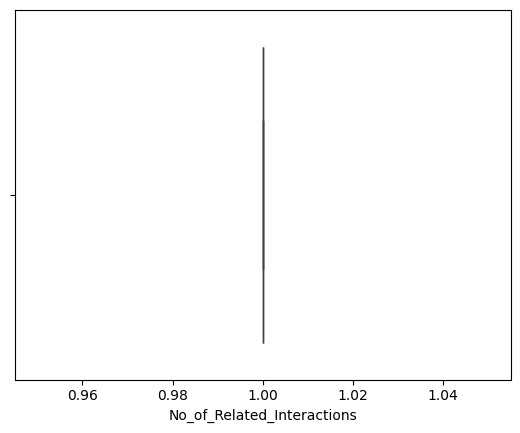

In [787]:
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.show()

In [788]:
# Median number of related interactions is 1.
# 75% of tickets have 3 or fewer related interactions.
# There are a few outliers with many related interactions (up to 20).

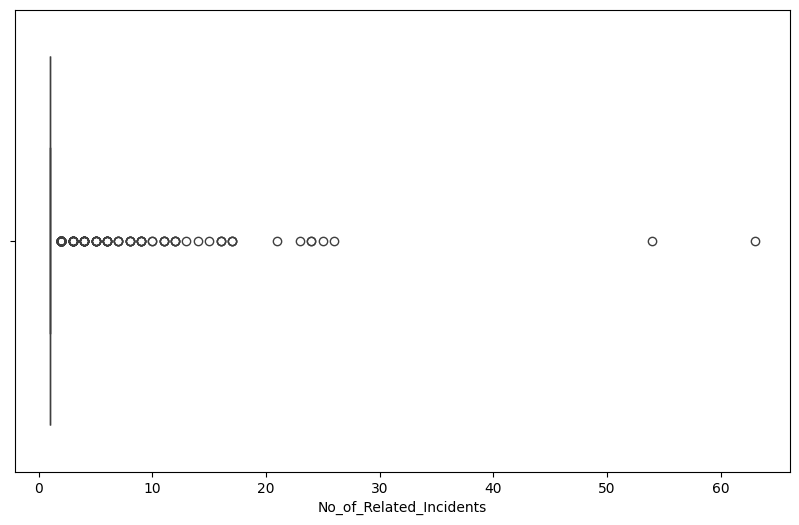

In [789]:
#Removing outlier for No_of_Related_Incidents
plt.figure(figsize=(10,6))
sns.boxplot(x=data['No_of_Related_Incidents'])
plt.show()

In [790]:
Q1=data["No_of_Related_Incidents"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Incidents"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [791]:
IQR=Q3-Q1
IQR

np.float64(0.0)

In [792]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [793]:
data.loc[data["No_of_Related_Incidents"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,2.0,2.0
13,application,Web Based Application,WBS000088,IM0000022,Closed,4,4,4.0,0.592713,incident,0.0,15-10-2012 15:50,NaN,14-11-2013 13:33,"6,67,54,16,667",Software,1.0,2.0,2.0
15,application,Web Based Application,WBS000055,IM0000024,Closed,4,4,4.0,0.701705,incident,3.0,23-10-2012 12:01,08-11-2013 14:57,08-11-2013 14:58,"2,83,79,50,556",Other,1.0,2.0,2.0
20,application,Web Based Application,WBS000088,IM0000035,Closed,4,4,4.0,0.428148,incident,0.0,24-12-2012 16:31,14-11-2013 09:49,14-11-2013 09:49,"1,93,04,83,333",Referred,1.0,2.0,2.0
119,application,Web Based Application,WBS000066,IM0000168,Closed,5,5,5.0,0.875886,incident,2.0,26-06-2013 12:09,18-11-2013 09:14,18-11-2013 09:15,"5,23,78,69,444",Software,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,application,Server Based Application,WBS000307,IM0045761,Closed,3,3,3.0,0.496306,incident,0.0,25-03-2014 03:30,25-03-2014 15:45,25-03-2014 15:46,"2,84,83,33,333",Hardware,1.0,2.0,2.0
45411,application,Desktop Application,WBS000092,IM0045838,Closed,2,3,2.0,0.427608,incident,1.0,25-03-2014 11:56,26-03-2014 08:10,26-03-2014 08:11,"7,16,91,66,667",Software,1.0,15.0,1.0
45962,subapplication,Web Based Application,WBS000162,IM0046398,Closed,2,2,2.0,0.922142,incident,0.0,27-03-2014 08:22,27-03-2014 09:31,27-03-2014 09:33,"1,19,55,55,556",Other,1.0,8.0,2.0
46263,subapplication,Web Based Application,WBS000073,IM0046710,Closed,5,5,5.0,0.572573,incident,2.0,28-03-2014 10:19,29-03-2014 08:24,29-03-2014 08:24,"7,66,86,11,111",Other,1.0,2.0,2.0


In [794]:
len(data.loc[data["No_of_Related_Incidents"]>upper_limit])/len(data)

0.003540392661731574

In [795]:
data.loc[data["No_of_Related_Incidents"]>upper_limit,"No_of_Related_Incidents"]=data["No_of_Related_Incidents"].median()

<Axes: xlabel='No_of_Related_Incidents'>

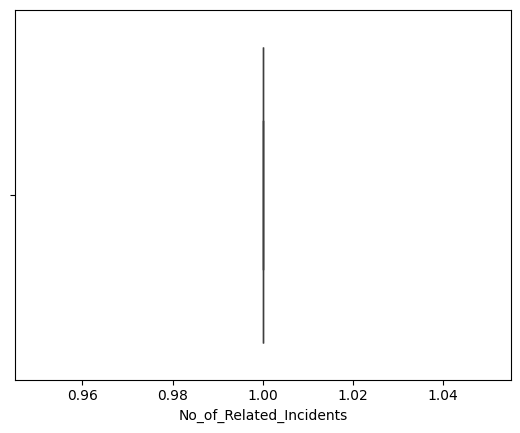

In [796]:
sns.boxplot(x=data.No_of_Related_Incidents)

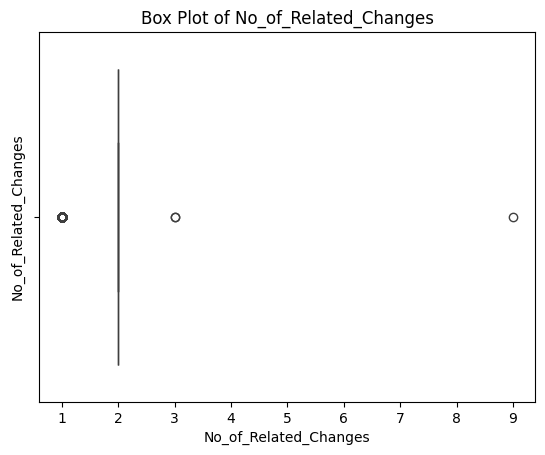

In [797]:
# Create a box plot for the 'No_of_Related_Changes' column
sns.boxplot(x=data['No_of_Related_Changes'])
plt.title('Box Plot of No_of_Related_Changes')
plt.ylabel('No_of_Related_Changes')
plt.show()

In [798]:
#Insights
#The most common number of related changes is 1.
#The distribution of the number of related changes is skewed to the right, meaning that there are more changes with fewer related changes than changes with more related changes.
#The maximum number of related changes is 53.
#The median number of related changes is 2.
#The 75th percentile of the number of related changes is 4.
#The 95th percentile of the number of related changes is 10

In [799]:
Q1=data["No_of_Related_Changes"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Changes"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2.0
upper_quartile 2.0


In [800]:
IQR=Q3-Q1
IQR

np.float64(0.0)

In [801]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.0
upper_limit is 2.0


In [802]:
data.loc[data["No_of_Related_Changes"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
360,application,Web Based Application,WBS000088,IM0000433,Closed,4,4,4.0,0.261065,incident,0.0,10-09-2013 13:09,05-12-2013 10:16,05-12-2013 10:17,"6,48,13,36,111",Unknown,1.0,1.0,3.0
24182,subapplication,Web Based Application,WBS000015,IM0024438,Closed,3,3,3.0,0.870326,incident,4.0,30-12-2013 11:40,20-01-2014 12:06,20-01-2014 12:06,"8,21,34,44,444",Software,1.0,1.0,9.0
42082,application,Web Based Application,WBS000302,IM0042443,Closed,4,4,4.0,0.582007,incident,2.0,10-03-2014 16:17,26-03-2014 16:28,26-03-2014 16:28,"10,78,325",Software,1.0,1.0,3.0


In [803]:
len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)*100

0.00643707756678468

In [804]:
data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

<Axes: xlabel='No_of_Related_Changes'>

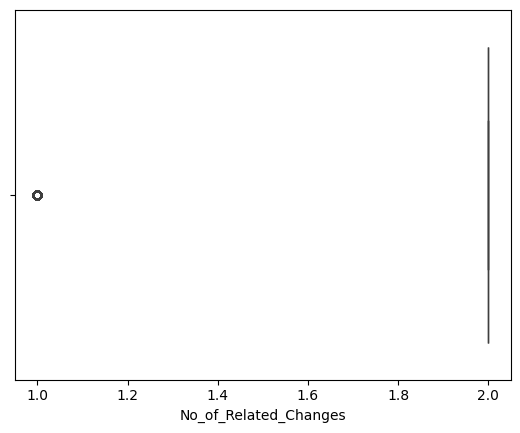

In [805]:
sns.boxplot(x=data.No_of_Related_Changes)

In [806]:
### Feature Engineering

In [807]:
#Feature Encoding
cat_data

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Open_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

In [808]:
#Feature Encoding - Converting categorical column into numerical columns
data.CI_Cat.unique()
data.CI_Cat.value_counts()

,count
CI_Cat,
application,33010
subapplication,7787
computer,3643
storage,917
hardware,915
software,333


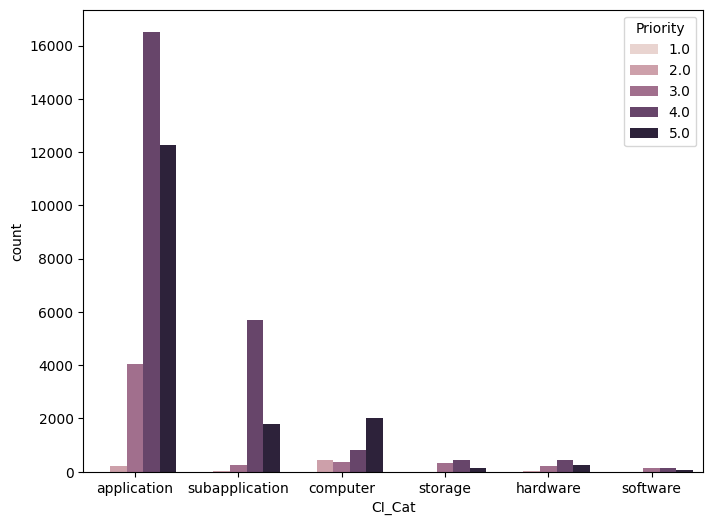

In [809]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['CI_Cat'],hue=data['Priority'],order=data['CI_Cat'].value_counts().index)
plt.show()

In [810]:
CI_Cat={'application':6,'subapplication':5,'computer': 4,'storage': 3,'hardware': 2,'software': 1}
data['CI_Cat']=data['CI_Cat'].map(CI_Cat)
data.head(2)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0


In [811]:
#Changing the categorical to numerical for CI_Subcat
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

,count
CI_Subcat,
Server Based Application,19207
Web Based Application,15422
Desktop Application,4299
System Software,2363
Laptop,1921
Banking Device,917
Client Based Application,579
Database,570
SAN,549


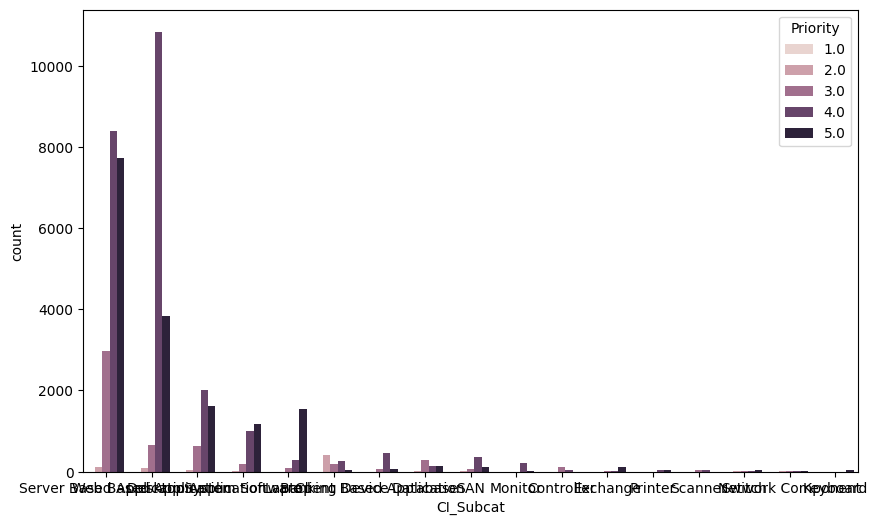

In [812]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['CI_Subcat'],hue=data['Priority'],order=data['CI_Subcat'].value_counts().index)
plt.show()

In [813]:
CI_Mapping={
'Server Based Application':1,
'Web Based Application':2,
'Desktop Application':3,
'System Software':4,
'Laptop':5,
'Banking Device':6,
'Client Based Application':7,
'Database':8,
'SAN':9,
'Monitor':10,
'Controller':11,
'Exchange':12,
'Printer':13,
'Scanner':14,
'Switch':15,
'Network Component':16,
'Keyboard':17
}
data['CI_Subcat']=data['CI_Subcat'].map(CI_Mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [814]:
#Converting status category into numerical values
data.Status.unique()
data.Status.value_counts()

,count
Status,
Closed,46596
Work in progress,9


<Axes: xlabel='Status', ylabel='count'>

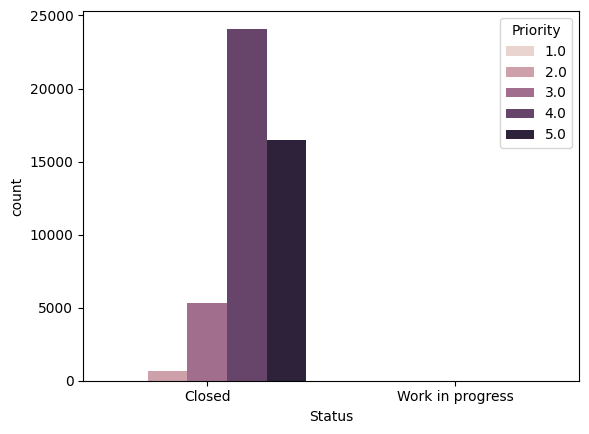

In [815]:
sns.countplot(data=data,x="Status",hue="Priority")

In [816]:
# Define a mapping for the 'Status' column
status_mapping = {'Closed': 1,'Work in progress': 0}

# Map the 'Status' column to numeric values
data['Status'] =data['Status'].map(status_mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,4,4,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,3,3.0,0.415050,incident,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,NS,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,4,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,4,4,4.0,0.345258,incident,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [817]:
#Converting Impact category into numerical values
data.Impact.unique()
data.Impact.value_counts()

,count
Impact,
4,22556
5,16740
3,5234
NS,1380
2,692
1,3


<Axes: xlabel='Impact', ylabel='count'>

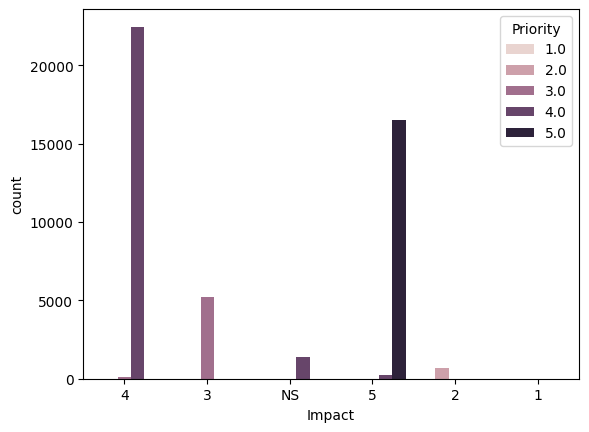

In [818]:
sns.countplot(data=data,x="Impact",hue="Priority")

In [819]:
Impact_mapping={
    "4":5,
    "5":4,
    "3":3,
    "NS":2,
    "2":1,
    "1":0
}
data["Impact"]=data["Impact"].map(Impact_mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,4,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,3,3.0,0.415050,incident,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,4,4.0,0.345258,incident,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [820]:
#Converting Urgency category into numerical values
data.Urgency.unique()
data.Urgency.value_counts()

,count
Urgency,
4,15526
5,12283
4,7062
5,4495
3,4419
3,2117
2,538
2,158
1,5


<Axes: xlabel='Urgency', ylabel='count'>

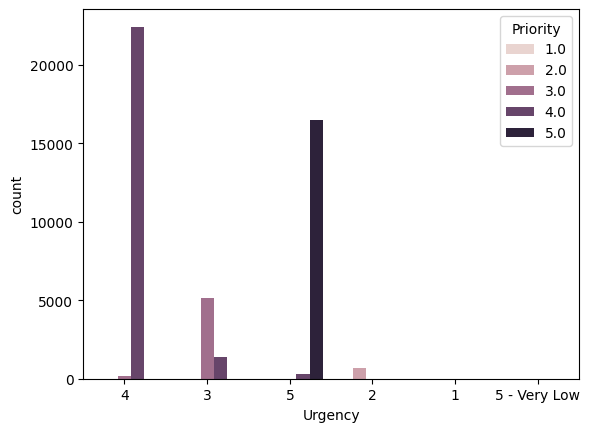

In [821]:
sns.countplot(data=data,x="Urgency",hue="Priority")

In [822]:
# # Define a mapping for the 'Urgency' column
urgency_mapping = {
   1: 1,
   1: 2,
   2: 3,
   2: 4,
   3: 5,
   3: 6,
   5: 7,
   5: 8,
   4: 9,
   4: 10,
  '5 - Very Low': 0  # Assuming '5 - Very Low' is mapped to 0
}

# Map the 'Urgency' column to numeric values
data['Urgency'] = data['Urgency'].map(urgency_mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,incident,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,incident,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,incident,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [823]:
#Converting category values into numerical values
data.Category.unique()
data.Category.value_counts()

,count
Category,
incident,37748
request for information,8846
complaint,11


<Axes: xlabel='Category', ylabel='count'>

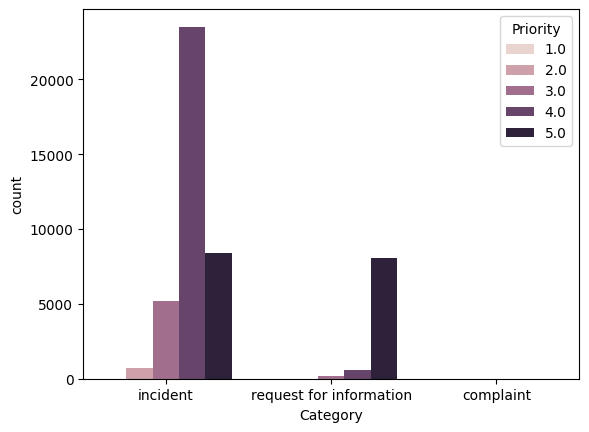

In [824]:
sns.countplot(x=data['Category'],hue=data['Priority'],order=data['Category'].value_counts().index)

In [825]:
Category_mapping={
    "incident":2,
    "request for information":1,
    "complaint":0
}
data["Category"]=data["Category"].map(Category_mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,2,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,2,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,2,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [826]:
#Converting Closure code category data into numerical data
data.Closure_Code.unique()
data.Closure_Code.value_counts()

,count
Closure_Code,
Other,16470
Software,13026
User error,3554
No error - works as designed,3530
Hardware,2999
Data,2209
Unknown,1590
Operator error,1539
User manual not used,765


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'User error'),
  Text(3, 0, 'No error - works as designed'),
  Text(4, 0, 'Hardware'),
  Text(5, 0, 'Data'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Operator error'),
  Text(8, 0, 'User manual not used'),
  Text(9, 0, 'other'),
  Text(10, 0, 'Inquiry'),
  Text(11, 0, 'Referred'),
  Text(12, 0, 'Questions'),
  Text(13, 0, 'Kwaliteit van de output'),
  Text(14, 0, 'Overig')])

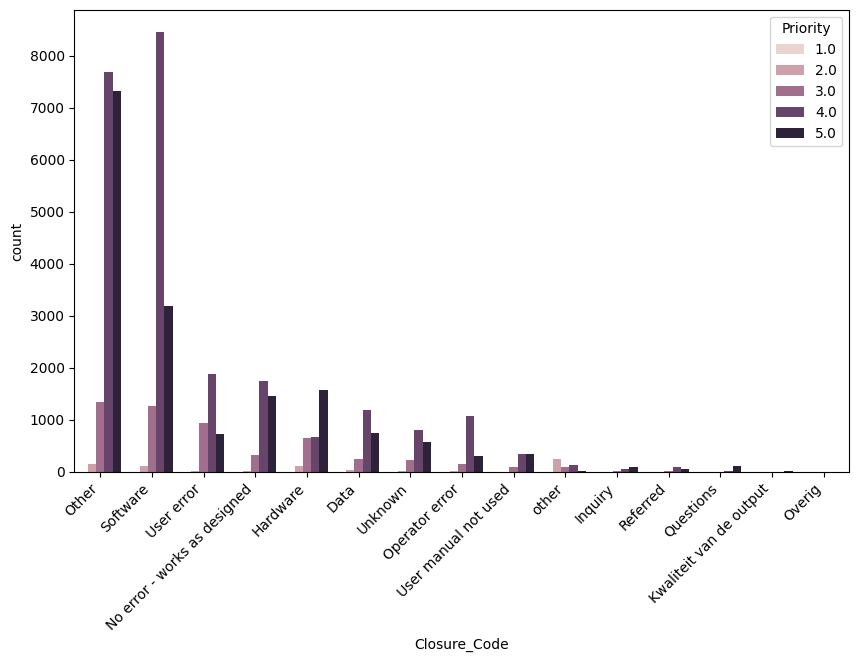

In [827]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Closure_Code'],hue=data['Priority'],order=data['Closure_Code'].value_counts().index)
plt.xticks(rotation=45,ha='right')

In [828]:
# Define a mapping dictionary
closure_code_mapping = {
    'Overig': 0,
    'Kwaliteit van de output': 1,
    'Questions': 2,
    'Referred': 3,
    'Inquiry': 4,
    'other': 5,
    'User manual not used': 6,
    'Operator error': 7,
    'Unknown': 8,
    'Data': 9,
    'Hardware': 10,
    'No error - works as designed': 11,
    'User error': 12,
    'Software': 13,
    'Other': 14
}

# Map the 'Closure_Code' column to numeric values
data['Closure_Code'] = data['Closure_Code'].map(closure_code_mapping)
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,2,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",14,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,2,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",13,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,2,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",14,1.0,1.0,2.0


In [829]:
data['Priority']=data['Priority'].astype('int32')

In [830]:
data.No_of_Related_Interactions=data["No_of_Related_Interactions"].astype("int32")

In [831]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   WBS                         46605 non-null  object 
 3   Incident_ID                 46605 non-null  object 
 4   Status                      46605 non-null  int64  
 5   Impact                      46605 non-null  int64  
 6   Urgency                     32768 non-null  float64
 7   Priority                    46605 non-null  int32  
 8   number_cnt                  46605 non-null  float64
 9   Category                    46605 non-null  int64  
 10  No_of_Reassignments         46605 non-null  float64
 11  Open_Time                   46605 non-null  object 
 12  Resolved_Time               44825 non-null  object 
 13  Close_Time                  46605 no

In [832]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

,count
No_of_Related_Interactions,
1,46605


**Feature** **Selection**

In [833]:
data1=data.copy()

In [834]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   WBS                         46605 non-null  object 
 3   Incident_ID                 46605 non-null  object 
 4   Status                      46605 non-null  int64  
 5   Impact                      46605 non-null  int64  
 6   Urgency                     32768 non-null  float64
 7   Priority                    46605 non-null  int32  
 8   number_cnt                  46605 non-null  float64
 9   Category                    46605 non-null  int64  
 10  No_of_Reassignments         46605 non-null  float64
 11  Open_Time                   46605 non-null  object 
 12  Resolved_Time               44825 non-null  object 
 13  Close_Time                  46605 no

In [837]:
data1.drop(["WBS", "Incident_ID","Urgency","No_of_Reassignments","No_of_Related_Incidents","No_of_Related_Changes","Open_Time","Resolved_Time","Close_Time","Handle_Time_hrs"], axis=1, inplace=True)

In [838]:
data1.corr()

,CI_Cat,CI_Subcat,Status,Impact,Priority,number_cnt,Category,Closure_Code,No_of_Related_Interactions
CI_Cat,1.000000,-0.678739,0.021987,0.117834,0.097858,-0.003594,-0.134113,0.164085,NaN
CI_Subcat,-0.678739,1.000000,-0.024049,-0.126796,-0.083676,0.008321,0.104760,-0.117438,NaN
Status,0.021987,-0.024049,1.000000,0.021728,0.021929,-0.006368,-0.006727,0.004353,NaN
Impact,0.117834,-0.126796,0.021728,1.000000,0.234440,0.000565,0.135758,0.112630,NaN
Priority,0.097858,-0.083676,0.021929,0.234440,1.000000,-0.000608,-0.477394,0.087934,NaN
number_cnt,-0.003594,0.008321,-0.006368,0.000565,-0.000608,1.000000,-0.010539,0.001353,NaN
Category,-0.134113,0.104760,-0.006727,0.135758,-0.477394,-0.010539,1.000000,-0.055994,NaN
Closure_Code,0.164085,-0.117438,0.004353,0.112630,0.087934,0.001353,-0.055994,1.000000,NaN
No_of_Related_Interactions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


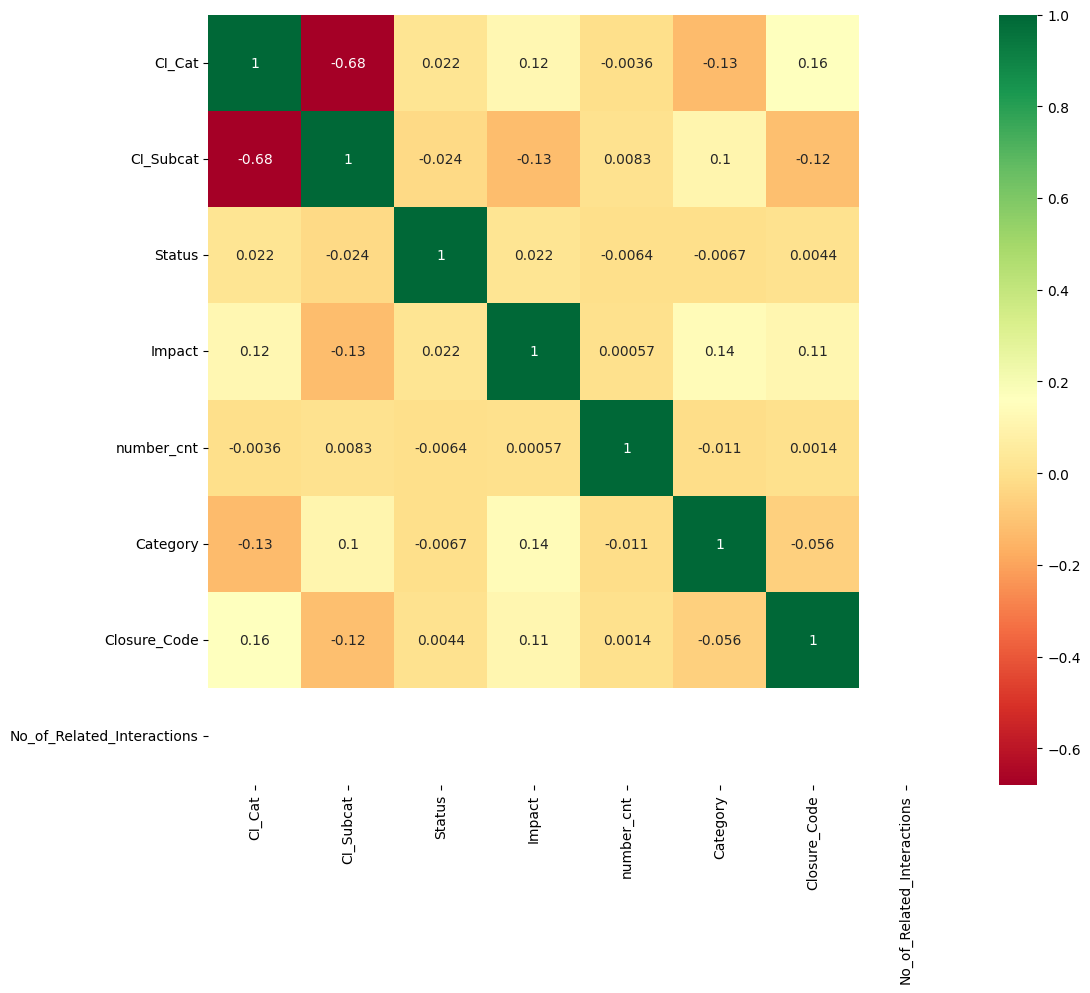

In [840]:
#Using pearson correlation
plt.figure(figsize=(12,10))
cor=data1.drop('Priority',axis=1).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.RdYlGn)
plt.show()

In [ ]:
#We have a Small Number of Datas. So we are not Dropping such columns. It has very less Correlation with Priority.

In [841]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [842]:
corr_features = correlation(data1, 0.7)
len(set(corr_features))

0

In [843]:
corr_features

set()

In [844]:
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4,0.601292,2,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",14,1,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3,0.415050,2,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",13,1,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4,0.345258,2,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",14,1,1.0,2.0


In [ ]:
#Predicting High Priority Task
#Splitting the dataset into X and y

In [845]:
X=data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y=data.Priority

In [846]:
X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,5,2,WBS000162,2
1,6,2,WBS000088,2
2,6,3,WBS000092,1
3,6,2,WBS000088,2
4,6,2,WBS000088,2


In [849]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
for i in (0,1,2,3):
  X.iloc[:,i]=encoder.fit_transform(X.iloc[:,i])

In [850]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [854]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [855]:
X_train.shape

(32623, 4)

In [856]:
X_test.shape

(13982, 4)

In [ ]:
#Model Selection

In [857]:
#Decision Tree
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [858]:
y_predict_dtree=model_dtree.predict(X_test)

In [859]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.8136175082248606
              precision    recall  f1-score   support

           2       0.51      0.58      0.54       224
           3       0.65      0.61      0.63      1607
           4       0.81      0.89      0.85      7229
           5       0.90      0.78      0.84      4922

    accuracy                           0.81     13982
   macro avg       0.72      0.72      0.71     13982
weighted avg       0.82      0.81      0.81     13982



In [860]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 131,   14,   54,   25],
       [  55,  973,  458,  121],
       [  64,  460, 6411,  294],
       [   7,   47, 1007, 3861]])

In [861]:
#Random_Forest
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [862]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [863]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8133314261192962
              precision    recall  f1-score   support

           2       0.51      0.58      0.55       224
           3       0.65      0.60      0.62      1607
           4       0.81      0.89      0.85      7229
           5       0.90      0.79      0.84      4922

    accuracy                           0.81     13982
   macro avg       0.72      0.71      0.71     13982
weighted avg       0.82      0.81      0.81     13982



In [864]:
confusion_matrix(y_test,y_predict_rf)

array([[ 131,   13,   56,   24],
       [  54,  960,  470,  123],
       [  64,  454, 6413,  298],
       [   7,   43, 1004, 3868]])

In [867]:
#Forecasting the Incident Volume
# Imporing the necessary columns
df = data.loc[:,['Incident_ID','Open_Time']]

In [868]:
df.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [869]:
import datetime as dt
# Define a function to parse the date formats
def parse_date(date_str):
    try:
        # Try to parse the date using one format
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # If the first format fails, try the second format
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')

# Apply the function to the 'Open_Time' column
df['Open_Time'] = df['Open_Time'].apply(parse_date)

# Convert the 'Open_Time' column to the desired string format
df['Open_Time'] = df['Open_Time'].dt.strftime('%Y-%m-%d')

# Print the modified DataFrame
df

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10
...,...,...
46601,IM0047053,2014-03-31
46602,IM0047054,2014-03-31
46603,IM0047055,2014-03-31
46604,IM0047056,2014-03-31


In [870]:
#EDA
# Adding a new column which will have the number of tickets per day
df['No_Incidents'] = df.groupby('Open_Time')['Incident_ID'].transform('count')

In [871]:
df.drop(['Incident_ID'],axis=1,inplace=True)

In [872]:
df.duplicated().sum()

np.int64(46274)

In [873]:
df.drop_duplicates(inplace=True)

In [874]:
df

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2
...,...,...
45857,2014-03-27,269
46154,2014-03-28,205
46354,2014-03-29,5
46386,2014-03-30,3


In [875]:
# Setting Date as the Index
df = df.set_index('Open_Time')
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [876]:
df.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [877]:
# Checking range of dates for our values
print(df.index.min(),'to',df.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [878]:
# Making a new Series with frequency as Day
data1 = df['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [879]:
data1.head()

,No_Incidents
Open_Time,
2012-02-05,1.0
2012-02-06,NaN
2012-02-07,NaN
2012-02-08,NaN
2012-02-09,NaN


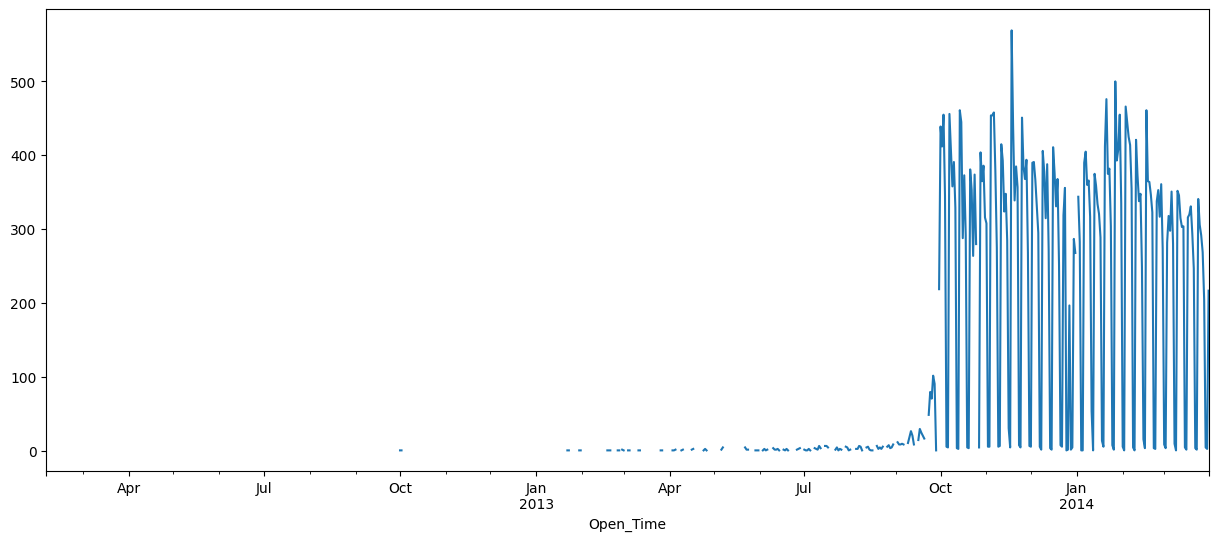

In [880]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [881]:
# Since not many tickets before October 2013, we consider only the latter values
datefrom2013 = df[df.index > dt.datetime(2013,10,1)]

In [882]:
datefrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [884]:
# new Series
data2 = datefrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

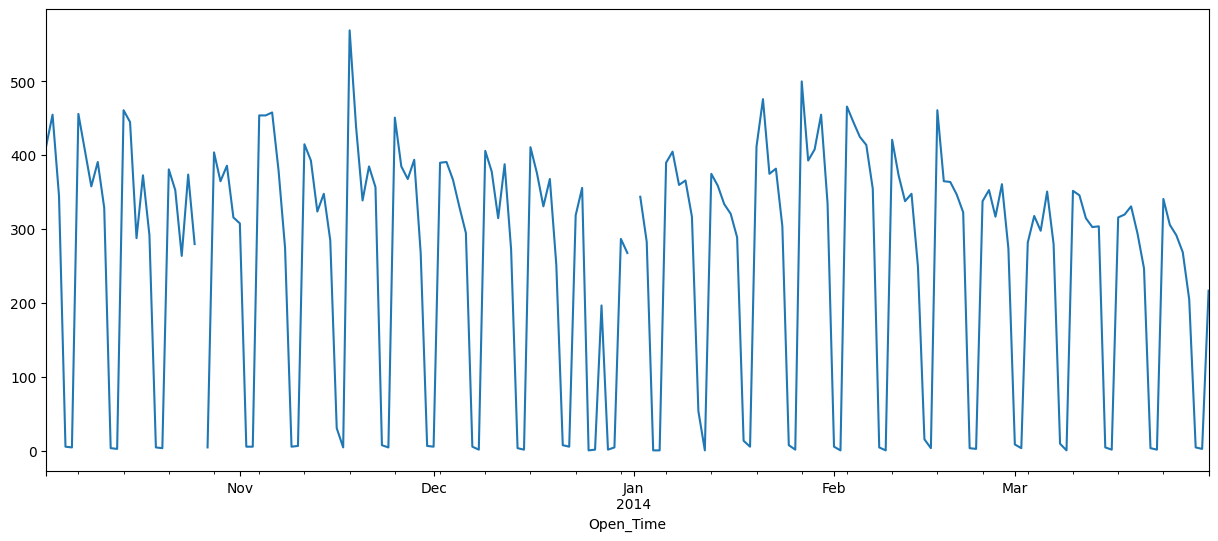

In [885]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [886]:
#Time Series Forecasting
import itertools
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [888]:
import statsmodels.api as sm
#Choosing Armia model
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6121269479636
ARIMA(0, 0, 1) - AIC:2373.781784431616
ARIMA(0, 1, 0) - AIC:2371.131939628779
ARIMA(0, 1, 1) - AIC:2313.135066817242
ARIMA(1, 0, 0) - AIC:2365.2932154567698
ARIMA(1, 0, 1) - AIC:2337.3182077384645
ARIMA(1, 1, 0) - AIC:2373.130961735599
ARIMA(1, 1, 1) - AIC:2294.4318089327044


In [889]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.772      0.000       0.163       0.515
ma.L1         -0.9990      0.455     -2.195      0.028      -1.891      -0.107
sigma2      2.519e+04   1.04e+04      2.419      0.016    4784.905    4.56e+04


In [890]:
#The summary of the selected ARIMA model (1,1,1) showed the coefficients for the autoregressive (AR) and moving average (MA) terms,
#As well as the sigma2 value representing the variance of the residuals
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

,predicted_mean
2014-03-03,172.0
2014-03-04,266.0
2014-03-05,279.0
2014-03-06,272.0
2014-03-07,291.0
...,...
2014-10-26,252.0
2014-10-27,252.0
2014-10-28,252.0
2014-10-29,252.0


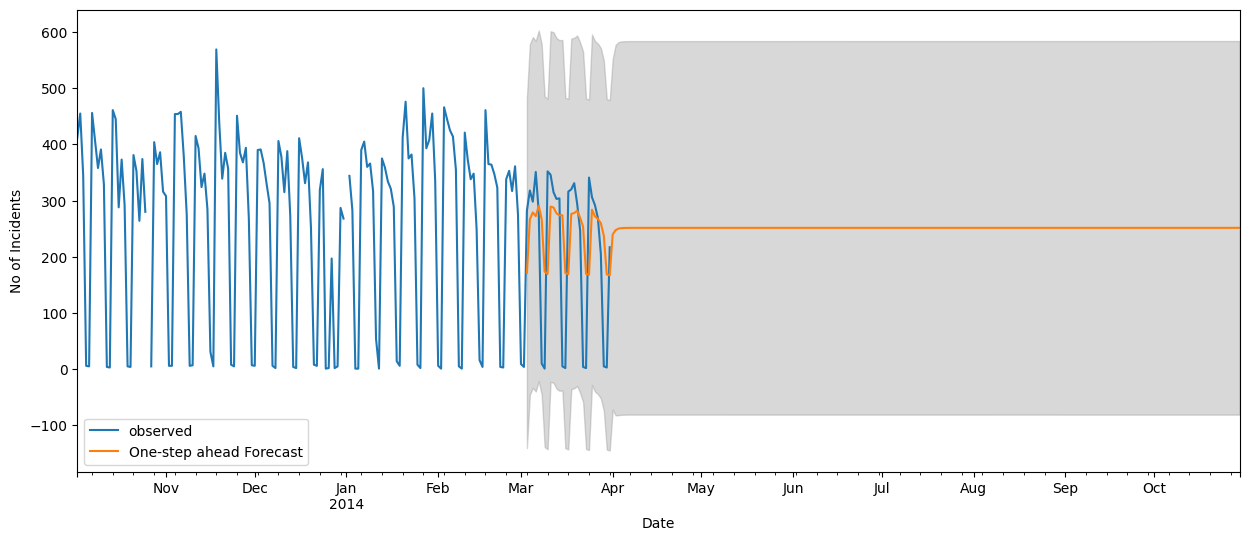

In [891]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

In [893]:
data['No_of_Related_Changes'].value_counts()

,count
No_of_Related_Changes,
2.0,46069
1.0,536


In [ ]:
#Predicting Request for change

In [894]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes
y1.value_counts()

,count
No_of_Related_Changes,
2.0,46069
1.0,536


In [895]:
X1.head(2)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,2,WBS000162,4,2,1,1.0
1,2,WBS000088,3,2,1,1.0


In [897]:
encoder= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = encoder.fit_transform(X1.iloc[:,i])

In [898]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [899]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [901]:
X1_train.shape

(32623, 6)

In [903]:
X1_test.shape

(13982, 6)

In [ ]:
#Model Selection

In [904]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [905]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [906]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9892719210413389
              precision    recall  f1-score   support

         1.0       0.29      0.03      0.05       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.64      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



In [907]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[    4,   140],
       [   10, 13828]])

In [908]:
#Random Forest Classifier
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [909]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [910]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.989414962094121
              precision    recall  f1-score   support

         1.0       0.33      0.03      0.05       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.66      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



In [911]:
confusion_matrix(y1_test,y1_predict_rf)

array([[    4,   140],
       [    8, 13830]])